# Contact Fux

The content for the current page can be downloaded here {download}`this notebook file <./ContactFlux_240307.ipynb>`.

The script is here {download}`Script <./F.pdf>`.

If you want to run the notebook press the rocket bottum which connects you to binder. Wait a little ...

This notebook is about the calculation of the heat flow at the contact of two media

In [1]:
# Load packages
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from ipywidgets import HBox, VBox

If you activate the following cell you get an interactive plot - enjoy it!

In [2]:
#%matplotlib ipympl

## Calculation of  a contact flux between to media

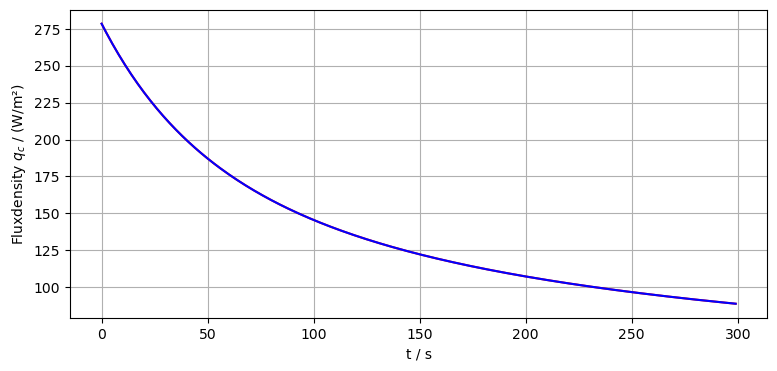

In [3]:
# Discretitations
Nx   = 20 # first medium
dx_0 = 0.005
Ny   = 20 # second medium
dy_0 = 0.005
Nt   = 60*5
dt   = 1

#------ material properties ------------
# water filled pot
lam_1   = 10    # 
rhocp_1 = 2000 * 1000
b_1     = (lam_1 * rhocp_1)**0.5
# straw
lam_2   = 0.05
rhocp_2 = 100 * 1000
b_2     = (lam_2 * rhocp_2)**0.5

# Initial temperatures
T1 = np.zeros((Nx, Nt)) + 60
T2 = np.zeros((Ny, Nt)) + 20

Tc      = (b_1 * T1[0, 0] + b_2 * T2[0, 0]) /(b_1 + b_2)
T1[-1, 0] = Tc
T2[0, 0]  = Tc

# Thermal diffusivities
a_1 = lam_1 / rhocp_1
a_2 = lam_2 / rhocp_2

sx  = a_1**0.5 #for scaling x
sy  = a_2**0.5 #for scaling y

dx = 10
dy = dx 
d1 = Nx * dx_0
d2 = Ny * dy_0

x  = np.linspace(0, d1, Nx)
y  = np.linspace(d1, d1+d2, Ny)

# Euler forward
for nt in range(0, Nt-1):
    for nx in range(1, Nx-1):
        T1[nx, nt+1] = T1[nx, nt] + dt / (dx*sx)**2 * a_1 * (T1[nx+1, nt] + T1[nx-1, nt] - 2*T1[nx, nt])
    T1[Nx-1, nt+1] = (T1[Nx-1, nt] + dt / ((dx*sx * rhocp_1 + dy*sy * rhocp_2) * 0.5) 
                    * (lam_1 / (dx*sx) * (T1[Nx-2, nt] - T1[Nx-1, nt]) -  lam_2 / (dy*sy) * (T2[0, nt] - T2[1, nt]))  )
    T2[0, nt+1]  = T1[Nx-1, nt+1] # Contacttemperature
    for ny in range(1, Ny-1):
        T2[ny, nt+1] = T2[ny, nt] + dt / (dy*sy)**2 * a_2 * (T2[ny+1, nt] + T2[ny-1, nt] - 2*T2[ny, nt])
qc_1 = lam_1 / (dx*sx) * (T1[-2, :] - T1[-1, :]) 
qc_2 = lam_2 / (dy*sy) * (T2[0, :] - T2[1, :]) 

# Design a figure with plot-axes (ax)
fig, ax = plt.subplots(figsize=(9, 4))
ax.plot(qc_1[::1], 'r-')
ax.plot(qc_2[::1], 'b-')
#ax.plot(x, T1[:, ::20], 'r-')
#ax.plot(y, T2[:, ::20], 'b-')
ax.set_ylabel('Fluxdensity $q_c$ / (W/m²)')
ax.set_xlabel('t / s')
ax.grid()
plt.show()

```{admonition} Exercises
:class: full-width

Now it's your turn! Modify 

- the discretisation in place and time
- the material properties and

write down what happens!

If you what to determine the thermal conductivity of a new material how do you have to design an experiment?

What time scale is important?

What initial temperatures do you prefer?
```